1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


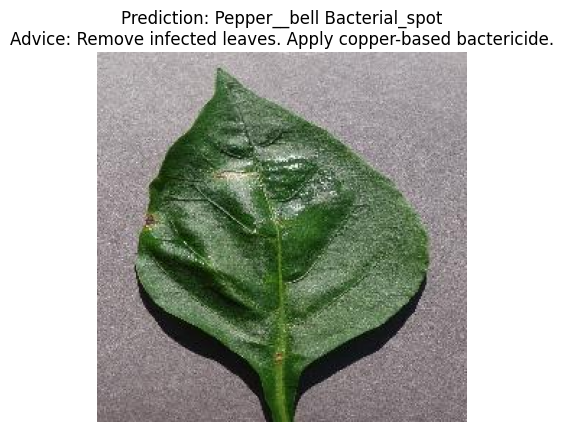

Predicted Disease/Status: Pepper__bell___Bacterial_spot
Care Advice: Remove infected leaves. Apply copper-based bactericide.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Load the trained model
model = load_model("plant_disease_model.h5")

# Define class labels (replace with your actual order if different)
class_labels = [
    'Pepper__bell___Bacterial_spot',
    'Pepper__bell___healthy',
    'Potato___Early_blight',
    'Potato___healthy',
    'Potato___Late_blight',
    'Tomato___Target_Spot',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___Tomato_YellowLeaf_Curl_Virus',
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___healthy',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites_Two_spotted_spider_mite'
]

# Define plant care advice for each label
care_advice = {
    'Pepper__bell___Bacterial_spot': "Remove infected leaves. Apply copper-based bactericide.",
    'Pepper__bell___healthy': "Your pepper plant is healthy. Maintain regular watering.",
    'Potato___Early_blight': "Use fungicide. Remove infected foliage. Avoid overhead watering.",
    'Potato___healthy': "Plant is healthy. Water when the topsoil is dry.",
    'Potato___Late_blight': "Apply fungicide quickly. Remove infected plants.",
    'Tomato___Target_Spot': "Use chlorothalonil-based fungicide. Improve air circulation.",
    'Tomato___Tomato_mosaic_virus': "Remove infected plants. Sterilize tools. Avoid smoking nearby.",
    'Tomato___Tomato_YellowLeaf_Curl_Virus': "Control whiteflies. Remove infected plants.",
    'Tomato___Bacterial_spot': "Apply copper fungicide. Avoid overhead irrigation.",
    'Tomato___Early_blight': "Use fungicide. Water at soil level. Rotate crops yearly.",
    'Tomato___healthy': "Tomato plant is healthy. Maintain full sun and weekly watering.",
    'Tomato___Late_blight': "Remove infected plants immediately. Apply fungicide.",
    'Tomato___Leaf_Mold': "Ensure proper spacing and ventilation. Apply sulfur fungicide.",
    'Tomato___Septoria_leaf_spot': "Remove lower leaves. Use fungicide like mancozeb.",
    'Tomato___Spider_mites_Two_spotted_spider_mite': "Spray neem oil. Rinse leaves regularly."
}

# Set image size used in model training
img_size = 128

# Function to load and preprocess a leaf image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    return np.expand_dims(img_array, axis=0)

# Predict the plant condition and provide care advice
def predict_and_advise(img_path):
    preprocessed = preprocess_image(img_path)
    prediction = model.predict(preprocessed)
    predicted_index = np.argmax(prediction)
    predicted_label = class_labels[predicted_index]
    advice = care_advice.get(predicted_label, "No advice found.")
    
    # Display image + result
    plt.imshow(image.load_img(img_path))
    plt.title(f"Prediction: {predicted_label.replace('___', ' ')}\nAdvice: {advice}")
    plt.axis('off')
    plt.show()
    
    return predicted_label, advice

# Example usage
img_path = "PlantVillage/PlantVillage/Pepper__bell___Bacterial_spot/0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG"  # Replace with your test image
label, suggestion = predict_and_advise(img_path)

print("Predicted Disease/Status:", label)
print("Care Advice:", suggestion)